In [112]:
### Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "mouse_drug_data.csv"
clinical_trial_data = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_data)
clinical_trial_data = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
pyma_data_combined = pd.merge(mouse_data,clinical_trial_data, on= "Mouse ID")
#pyma_sd = data_combined


# Display the data table for preview
print("         Mouse and Clinical Trial Data Combined ")

pyma_data_combined.head()


         Mouse and Clinical Trial Data Combined 


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [113]:
### Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
pyma_data_grouped = pyma_data_combined.groupby(["Drug", "Timepoint"])

#Create a variable to store the mean of the tumor volume
pyma_data_grouped_mean = pyma_data_grouped["Tumor Volume (mm3)"].mean()

# create a dataframe
pyma_data_grouped_tv_mean = pd.DataFrame({ "Mean of the Tumor Volume":pyma_data_grouped_mean })

# Preview DataFrame
print("       Tumor Response to Treatment")
pyma_data_grouped_tv_mean.reset_index().head()


       Tumor Response to Treatment


,Drug,Timepoint,Mean of the Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [114]:
### Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#Create variable to hold the SEM of the tumor volume
pyma_data_grouped_sem = pyma_data_grouped["Tumor Volume (mm3)"].sem()

# Create a DataFrame
pyma_data_grouped_tv_sem = pd.DataFrame({ "Standards Error of the Mean":pyma_data_grouped_sem })

# Preview DataFrame
pyma_data_grouped_tv_sem.reset_index().head()

,Drug,Timepoint,Standards Error of the Mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [115]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_pyma_data_grouped_tv_mean=pyma_data_grouped_tv_mean.pivot_table(values="Mean of the Tumor Volume",
                                                                            index=["Timepoint"], columns="Drug")
# Preview that Reformatting worked
reformatted_pyma_data_grouped_tv_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


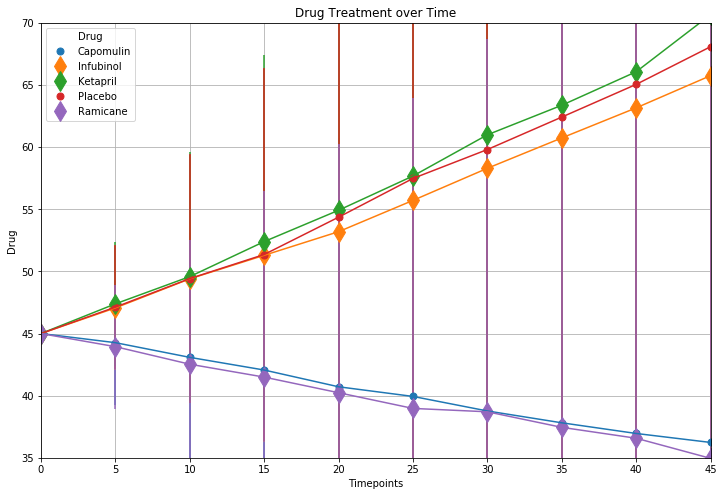

In [116]:
#recieved help from https://stackoverflow.com/questions/52035184/pandas-plot-line-graph-with-both-error-bars-and-markers
# Generate the Plot (with Error Bars)

mean_df = reformatted_pyma_data_grouped_tv_mean[['Capomulin','Infubinol','Ketapril','Placebo', 'Ramicane']]
mean_errors = reformatted_pyma_data_grouped_tv_mean.index

#plot error bars
ax = mean_df.plot(figsize=(12,8), yerr = mean_errors, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
mean_df.plot(figsize=(12,8), style=['.', 'd', 'd', '.', 'd'], markersize=14, ax = ax)
plt.ylim(35, 70)
plt.title("Drug Treatment over Time")
plt.xlabel("Timepoints")
plt.ylabel("Drug")
plt.grid(True)

plt.savefig("Images/mean.png")
plt.show()


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [117]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
pyma_data_grouped = pyma_data_combined.groupby(["Drug", "Timepoint"])

pyma_met_data_mean = pyma_data_grouped["Metastatic Sites"].mean()

# Convert to DataFrame
pyma_met_data_mean_df = pd.DataFrame({ "Mean of the Metastatic Sites":pyma_met_data_mean})

# Preview DataFrame
print("    Metastatic Response to Treatment")
pyma_met_data_mean_df.reset_index().head()

    Metastatic Response to Treatment


,Drug,Timepoint,Mean of the Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [118]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
pyma_met_data_sem = pyma_data_grouped["Metastatic Sites"].sem()

# Convert to DataFrame
pyma_met_data_sem_df = pd.DataFrame({ "Standards Error of the Metastatic Sites":
                                     pyma_met_data_sem})

# Preview DataFrame
pyma_met_data_sem_df.reset_index().head()

,Drug,Timepoint,Standards Error of the Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [119]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_pyma_met_data_mean_df=pyma_met_data_mean_df.pivot_table(values="Mean of the Metastatic Sites",
                                                                            index=["Timepoint"], columns="Drug")
# Preview that Reformatting worked
reformatted_pyma_met_data_mean_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


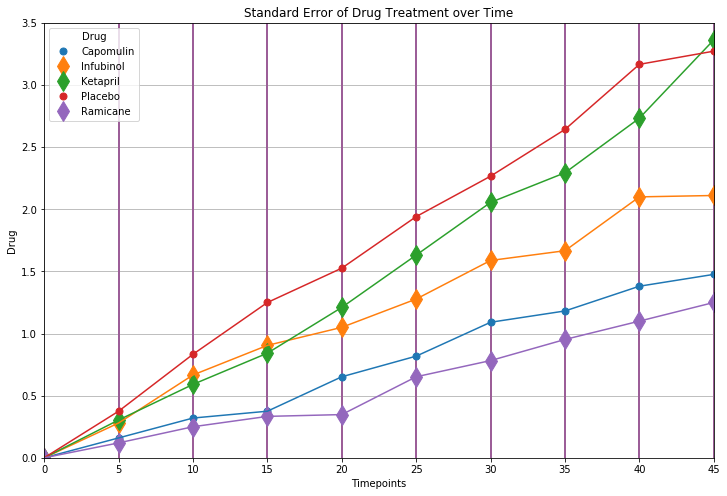

In [120]:
# Generate the Plot (with Error Bars)
sem_df = reformatted_pyma_met_data_mean_df[['Capomulin','Infubinol','Ketapril','Placebo', 'Ramicane']]
sem_errors = reformatted_pyma_met_data_mean_df.index

#plot error bars
ax = sem_df.plot(figsize=(12,8), yerr = sem_errors, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
sem_df.plot(figsize=(12,8), style=['.', 'd', 'd', '.', 'd'], markersize=14, ax = ax)
plt.ylim(0,3.5)
plt.title("Standard Error of Drug Treatment over Time")
plt.xlabel("Timepoints")
plt.ylabel("Drug")
plt.grid(True)
plt.savefig("Images/stand_err.png")
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [121]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
pyma_data_survival_mouse_ct=pyma_data_grouped["Mouse ID"].nunique()

# Convert to DataFrame
pyma_data_survival_df=pd.DataFrame({"Mouse Count":pyma_data_survival_mouse_ct})

# Preview DataFrame
pyma_data_survival_df.reset_index().head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [122]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_pyma_data_survival_df=pyma_data_survival_df.pivot_table(values="Mouse Count",
                                                                            index=["Timepoint"], columns="Drug")
# Preview that Reformatting worked
reformatted_pyma_data_survival_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [123]:
# Store the percent of survival to use for plot
pyma_data_survival_mouse_ct_percent = pyma_data_grouped["Mouse ID"].nunique()/25*100

# Convert to DataFrame
pyma_data_survival_mouse_ct_percent_df=pd.DataFrame({"Mouse Count":pyma_data_survival_mouse_ct_percent})

# Preview DataFrame
pyma_data_survival_mouse_ct_percent_df.reset_index().head()

reformatted_pyma_data_survival_mouse_ct_percent_df=pyma_data_survival_mouse_ct_percent_df.pivot_table(values="Mouse Count",
         index=["Timepoint"], columns="Drug")

# Preview that Reformatting worked
reformatted_pyma_data_survival_mouse_ct_percent_df 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


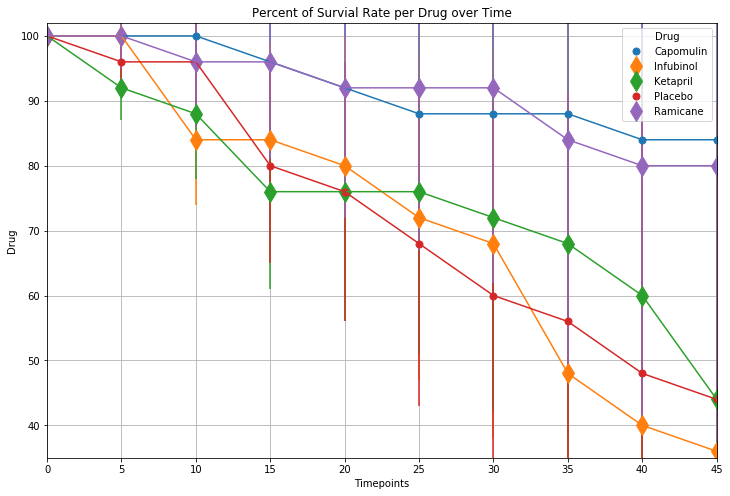

In [124]:
# Generate the Plot (with Error Bars)
survival_percent_df = reformatted_pyma_data_survival_mouse_ct_percent_df[['Capomulin','Infubinol','Ketapril','Placebo', 'Ramicane']]
survival_percent_errors = reformatted_pyma_data_survival_mouse_ct_percent_df.index

#plot error bars
ax = survival_percent_df.plot(figsize=(12,8), yerr = survival_percent_errors, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
survival_percent_df.plot(figsize=(12,8), style=['.', 'd', 'd', '.', 'd'], markersize=14, ax = ax)
plt.ylim(35, 102)
plt.title("Percent of Survial Rate per Drug over Time")
plt.xlabel("Timepoints")
plt.ylabel("Drug")
plt.grid(True)
plt.savefig("Images/survival.png")
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [125]:
# Calculate the percent changes for each drug
beg_tumor_vol = reformatted_pyma_data_grouped_tv_mean.iloc[0]
ending_tumor_vol = reformatted_pyma_data_grouped_tv_mean.iloc[-1]
percent_change = ((ending_tumor_vol-beg_tumor_vol)/beg_tumor_vol)*100
percent_change_df = pd.DataFrame({"Percent Change": percent_change})
                     

percent_change_df

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [126]:
# Store all Relevant Percent Changes into a Tuple
percent_change_df.apply(tuple, axis=1)

Drug
Capomulin    (-19.475302667894173,)
Ceftamin       (42.51649185589744,)
Infubinol      (46.12347172785187,)
Ketapril      (57.028794686606076,)
Naftisol       (53.92334713476923,)
Placebo        (51.29796048315153,)
Propriva       (47.24117486320637,)
Ramicane     (-22.320900462766673,)
Stelasyn      (52.085134287899024,)
Zoniferol      (46.57975086509525,)
dtype: object

In [127]:
# Splice the data between passing and failing drugs
def color_negative_green(val):
    color = 'green' if val < 0 else 'red'
    return 'color: %s' % color
print("Drung Treatments with Positive Results are Highlited in Green")
percent_change_df.style.applymap(color_negative_green)


Drung Treatments with Positive Results are Highlited in Green


,Percent Change
Drug,
Capomulin,-19.4753
Ceftamin,42.5165
Infubinol,46.1235
Ketapril,57.0288
Naftisol,53.9233
Placebo,51.298
Propriva,47.2412
Ramicane,-22.3209
Stelasyn,52.0851


In [128]:
#Data set up for next chart
volume_stats = {"Drug": ['Capomulin','Infubinol','Ketapril','Placebo', "Ramicane"],
                "Percent Change in Tumor Vol": [-19.475303, 46.123472, 57.028795, 51.29796, -22.3209]}

volume_change = pd.DataFrame(data=volume_stats)

volume_change

,Drug,Percent Change in Tumor Vol
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960
4,Ramicane,-22.320900


In [129]:
reformatted_volume_change=volume_change.pivot_table(values="Percent Change in Tumor Vol",
         index=["Drug"], columns="Drug")
reformatted_volume_change

Drug,Capomulin,Infubinol,Ketapril,Placebo,Ramicane
Drug,,,,,
Capomulin,-19.475303,NaN,NaN,NaN,NaN
Infubinol,NaN,46.123472,NaN,NaN,NaN
Ketapril,NaN,NaN,57.028795,NaN,NaN
Placebo,NaN,NaN,NaN,51.29796,NaN
Ramicane,NaN,NaN,NaN,NaN,-22.3209


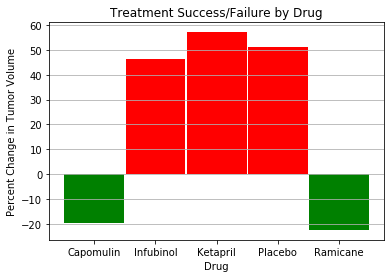

In [130]:
#Chart treatment success/failure
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes

tumor_volume_change = [-19.475303, 46.123472, 57.028795, 51.29796, -22.3209]
x_axis = np.arange(len(tumor_volume_change))
plt.bar(x_axis, tumor_volume_change, color=['green','red','red','red'], width = .98)
# percent_change_df.style.applymap(color_negative_green)
tick_locations = [value for value in x_axis]
#for p in ax.patches:
    #ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xticks(tick_locations, ['Capomulin','Infubinol','Ketapril','Placebo', 'Ramicane'])
plt.title("Treatment Success/Failure by Drug")
plt.xlabel("Drug")
plt.ylabel("Percent Change in Tumor Volume")
plt.grid(axis="y")


plt.savefig("Images/success.png")                                           

![Metastatic Spread During Treatment](../Images/change.png)